In [1]:
import cymetric as cym
from cymetric import graphs as cgr
from cymetric import timeseries as tm

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
db = cym.dbopen("separate_ore1.sqlite")
ev = cym.Evaluator(db=db)

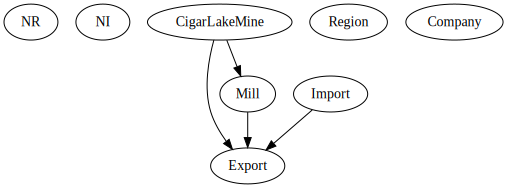

In [3]:
cgr.flow_graph(ev)

In [4]:
trs_mine = tm.transactions(ev, senders = ['CigarLakeMine'], receivers = ["Export"])
trs_import = tm.transactions(ev, senders = ["Import"], receivers = ["Export"])
trs_mill = tm.transactions(ev, senders = ["Mill"], receivers = ["Export"])

In [5]:
trs = trs_mine.join(trs_import, on='Time', how='inner', rsuffix='1')
trs = trs.join(trs_mill, on='Time', how='inner', rsuffix='2')
trs = trs.drop(columns=["Time1"])
trs = trs.rename(columns = {"Mass":"CigarLakeMine", "Mass1":"Import", "Mass2":"Mill"})

trs_melted = pd.melt(trs, id_vars=["Time"], value_vars = ["CigarLakeMine", "Import", "Mill"])
trs_melted.head(8)

,Time,variable,value
0,0,CigarLakeMine,175000.0
1,1,CigarLakeMine,175000.0
2,2,CigarLakeMine,175000.0
3,3,CigarLakeMine,175000.0
4,4,CigarLakeMine,175000.0
5,5,CigarLakeMine,175000.0
6,6,CigarLakeMine,175000.0
7,7,CigarLakeMine,175000.0


[Text(0.5, 0, 'Month'),
 Text(0, 0.5, ''),
 Text(0.5, 1.0, 'Transactions into Export')]

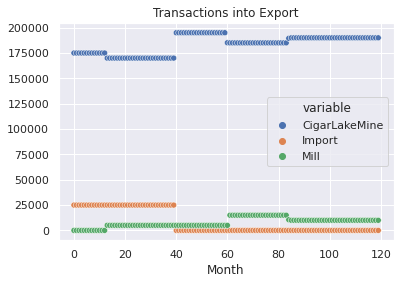

In [6]:
sns.set_theme()

g = sns.scatterplot(data = trs_melted, x='Time', y='value', hue="variable")
g.set(xlabel='Month', ylabel='', title='Transactions into Export')

Text(0.5, 1.0, 'Mass of U235 exported')

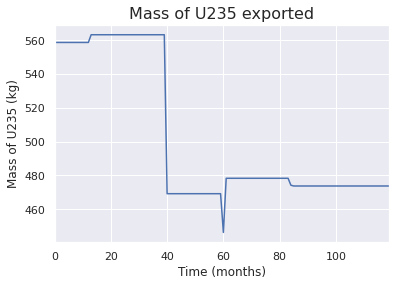

In [17]:
U235_mass = tm.transactions(evaler=ev, receivers=['Export'], nucs=['92235'])
U235_mass.plot(x='Time', legend=False)
plt.xlabel('Time (months)',fontsize=12)
plt.ylabel('Mass of U235 (kg)',fontsize=12)
plt.title('Mass of U235 exported',fontsize=16)

Text(0.5, 1.0, 'Cumulative Mass of U235 exported')

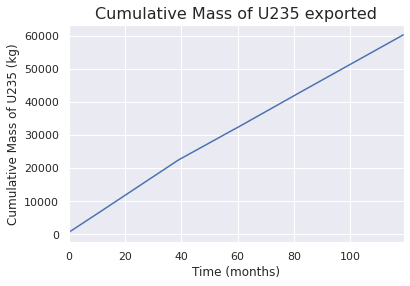

In [19]:
U235_mass['CumMass'] = U235_mass['Mass'].cumsum()
U235_mass.plot(x='Time', y='CumMass', legend=False)
plt.xlabel('Time (months)',fontsize=12)
plt.ylabel('Cumulative Mass of U235 (kg)',fontsize=12)
plt.title('Cumulative Mass of U235 exported',fontsize=16)